In [12]:
import os
from pathlib import Path
import pandas as pd

from es_sfgtools.data_mgmt.data_handler import DataHandler
pride_path = Path.home() / ".PRIDE_PPPAR_BIN"
os.environ["PATH"] += os.pathsep + str(pride_path)
import matplotlib.pyplot as plt
%matplotlib ipympl


In [2]:
main_dir = Path("/Users/franklyndunbar/Project/SeaFloorGeodesy/Data/SFGMain")
dh = DataHandler(main_dir)

network = "cascadia-gorda"
station = "NCC1"
survey = "2024_A_1126"

dh.change_working_station(network=network, station=station, campaign=survey)



Built directory structure for cascadia-gorda NCC1 2024_A_1126
No date range set for cascadia-gorda, NCC1, 2024_A_1126
Creating TileDB arrays for NCC1
Consolidating existing TileDB arrays for NCC1
Changed working station to cascadia-gorda NCC1 2024_A_1126


In [3]:
print(dates:=dh.kin_position_tdb.get_unique_dates())

['2022-05-01' '2022-05-03' '2022-05-04' '2022-05-05' '2022-05-06'
 '2022-05-07' '2022-05-08' '2022-05-09' '2023-09-08' '2023-09-09'
 '2023-09-10' '2023-09-11' '2023-09-12' '2023-09-13' '2023-09-14']


In [4]:
dates[0]

numpy.datetime64('2022-05-01')

In [46]:
kin_positions = dh.kin_position_tdb.read_df(dates[4], dates[5])
shotdata = dh.shotdata_tdb_pre.read_df(dates[4], dates[5])


In [47]:
kin_positions.head()

,time,latitude,longitude,height,east,north,up,number_of_satellites,pdop,wrms
0,2022-05-06 00:00:00.000,41.659099,235.062105,-28.1257,-2.733000e+06,-3.912147e+06,4.217372e+06,11,1.4,5.380650
1,2022-05-06 00:00:00.999,41.659097,235.062103,-27.1692,-2.733000e+06,-3.912147e+06,4.217372e+06,11,1.4,4.074118
2,2022-05-06 00:00:01.999,41.659097,235.062104,-27.6261,-2.733000e+06,-3.912147e+06,4.217372e+06,11,1.4,3.511849
3,2022-05-06 00:00:02.999,41.659093,235.062116,-28.1595,-2.732999e+06,-3.912147e+06,4.217371e+06,11,1.4,3.025103
4,2022-05-06 00:00:04.000,41.659087,235.062120,-28.9036,-2.732999e+06,-3.912148e+06,4.217370e+06,11,1.4,2.820126


In [7]:
shotdata.head()

,pingTime,transponderID,head0,pitch0,roll0,head1,pitch1,roll1,east0,north0,...,east_std1,north_std1,up_std1,returnTime,tt,dbv,xc,snr,tat,isUpdated
0,1.651795e+09,IR5209,131.765137,-1.059283,1.794902,132.588379,3.650667,0.141165,-2.733001e+06,-3.912147e+06,...,7.788,8.154,23.0,1.651795e+09,1.636898,-30,68,15.0,0.2,0
1,1.651795e+09,IR5209,150.774673,-0.521324,-3.328873,143.650452,3.974211,1.485776,-2.733006e+06,-3.912151e+06,...,7.804,8.155,23.0,1.651795e+09,1.634609,-10,76,36.0,0.2,0
2,1.651795e+09,IR5209,130.266647,3.410717,-2.966369,132.388718,4.405166,0.993787,-2.733012e+06,-3.912156e+06,...,7.845,8.155,23.0,1.651795e+09,1.631912,-10,88,37.0,0.2,0
3,1.651795e+09,IR5209,141.069656,-13.314089,8.962605,137.545593,3.645947,2.781657,-2.733016e+06,-3.912161e+06,...,7.843,8.131,23.0,1.651795e+09,1.627579,-10,80,38.0,0.2,0
4,1.651795e+09,IR5209,137.902283,-3.733109,-6.117216,138.326904,5.988830,-2.783530,-2.733020e+06,-3.912166e+06,...,7.828,8.125,23.0,1.651795e+09,1.624502,-13,78,34.0,0.2,0


In [13]:
shotdata = shotdata[shotdata.transponderID=="IR5209"]
shotdata.pingTime = pd.to_datetime(shotdata.pingTime, unit='s')
shotdata.returnTime = pd.to_datetime(shotdata.returnTime, unit='s')
shotdata.head()

,pingTime,transponderID,head0,pitch0,roll0,head1,pitch1,roll1,east0,north0,...,east_std1,north_std1,up_std1,returnTime,tt,dbv,xc,snr,tat,isUpdated
0,2022-05-06 00:00:09,IR5209,131.765137,-1.059283,1.794902,132.588379,3.650667,0.141165,-2.733001e+06,-3.912147e+06,...,7.788,8.154,23.0,2022-05-06 00:00:10.836898088,1.636898,-30,68,15.0,0.2,0
1,2022-05-06 00:00:24,IR5209,150.774673,-0.521324,-3.328873,143.650452,3.974211,1.485776,-2.733006e+06,-3.912151e+06,...,7.804,8.155,23.0,2022-05-06 00:00:25.834609032,1.634609,-10,76,36.0,0.2,0
2,2022-05-06 00:00:39,IR5209,130.266647,3.410717,-2.966369,132.388718,4.405166,0.993787,-2.733012e+06,-3.912156e+06,...,7.845,8.155,23.0,2022-05-06 00:00:40.831912041,1.631912,-10,88,37.0,0.2,0
3,2022-05-06 00:00:54,IR5209,141.069656,-13.314089,8.962605,137.545593,3.645947,2.781657,-2.733016e+06,-3.912161e+06,...,7.843,8.131,23.0,2022-05-06 00:00:55.827579021,1.627579,-10,80,38.0,0.2,0
4,2022-05-06 00:01:09,IR5209,137.902283,-3.733109,-6.117216,138.326904,5.988830,-2.783530,-2.733020e+06,-3.912166e+06,...,7.828,8.125,23.0,2022-05-06 00:01:10.824501991,1.624502,-13,78,34.0,0.2,0


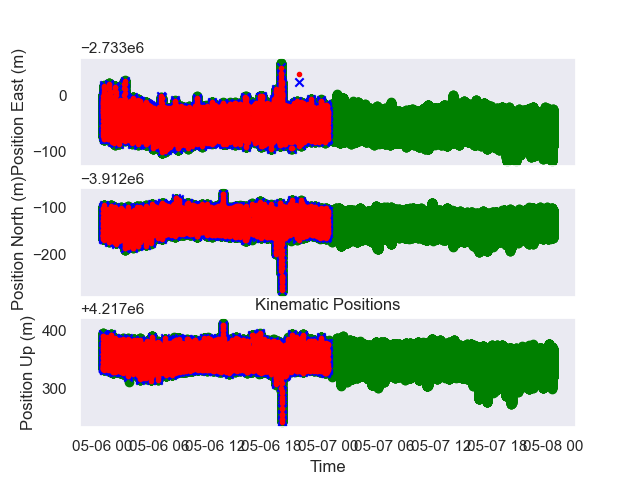

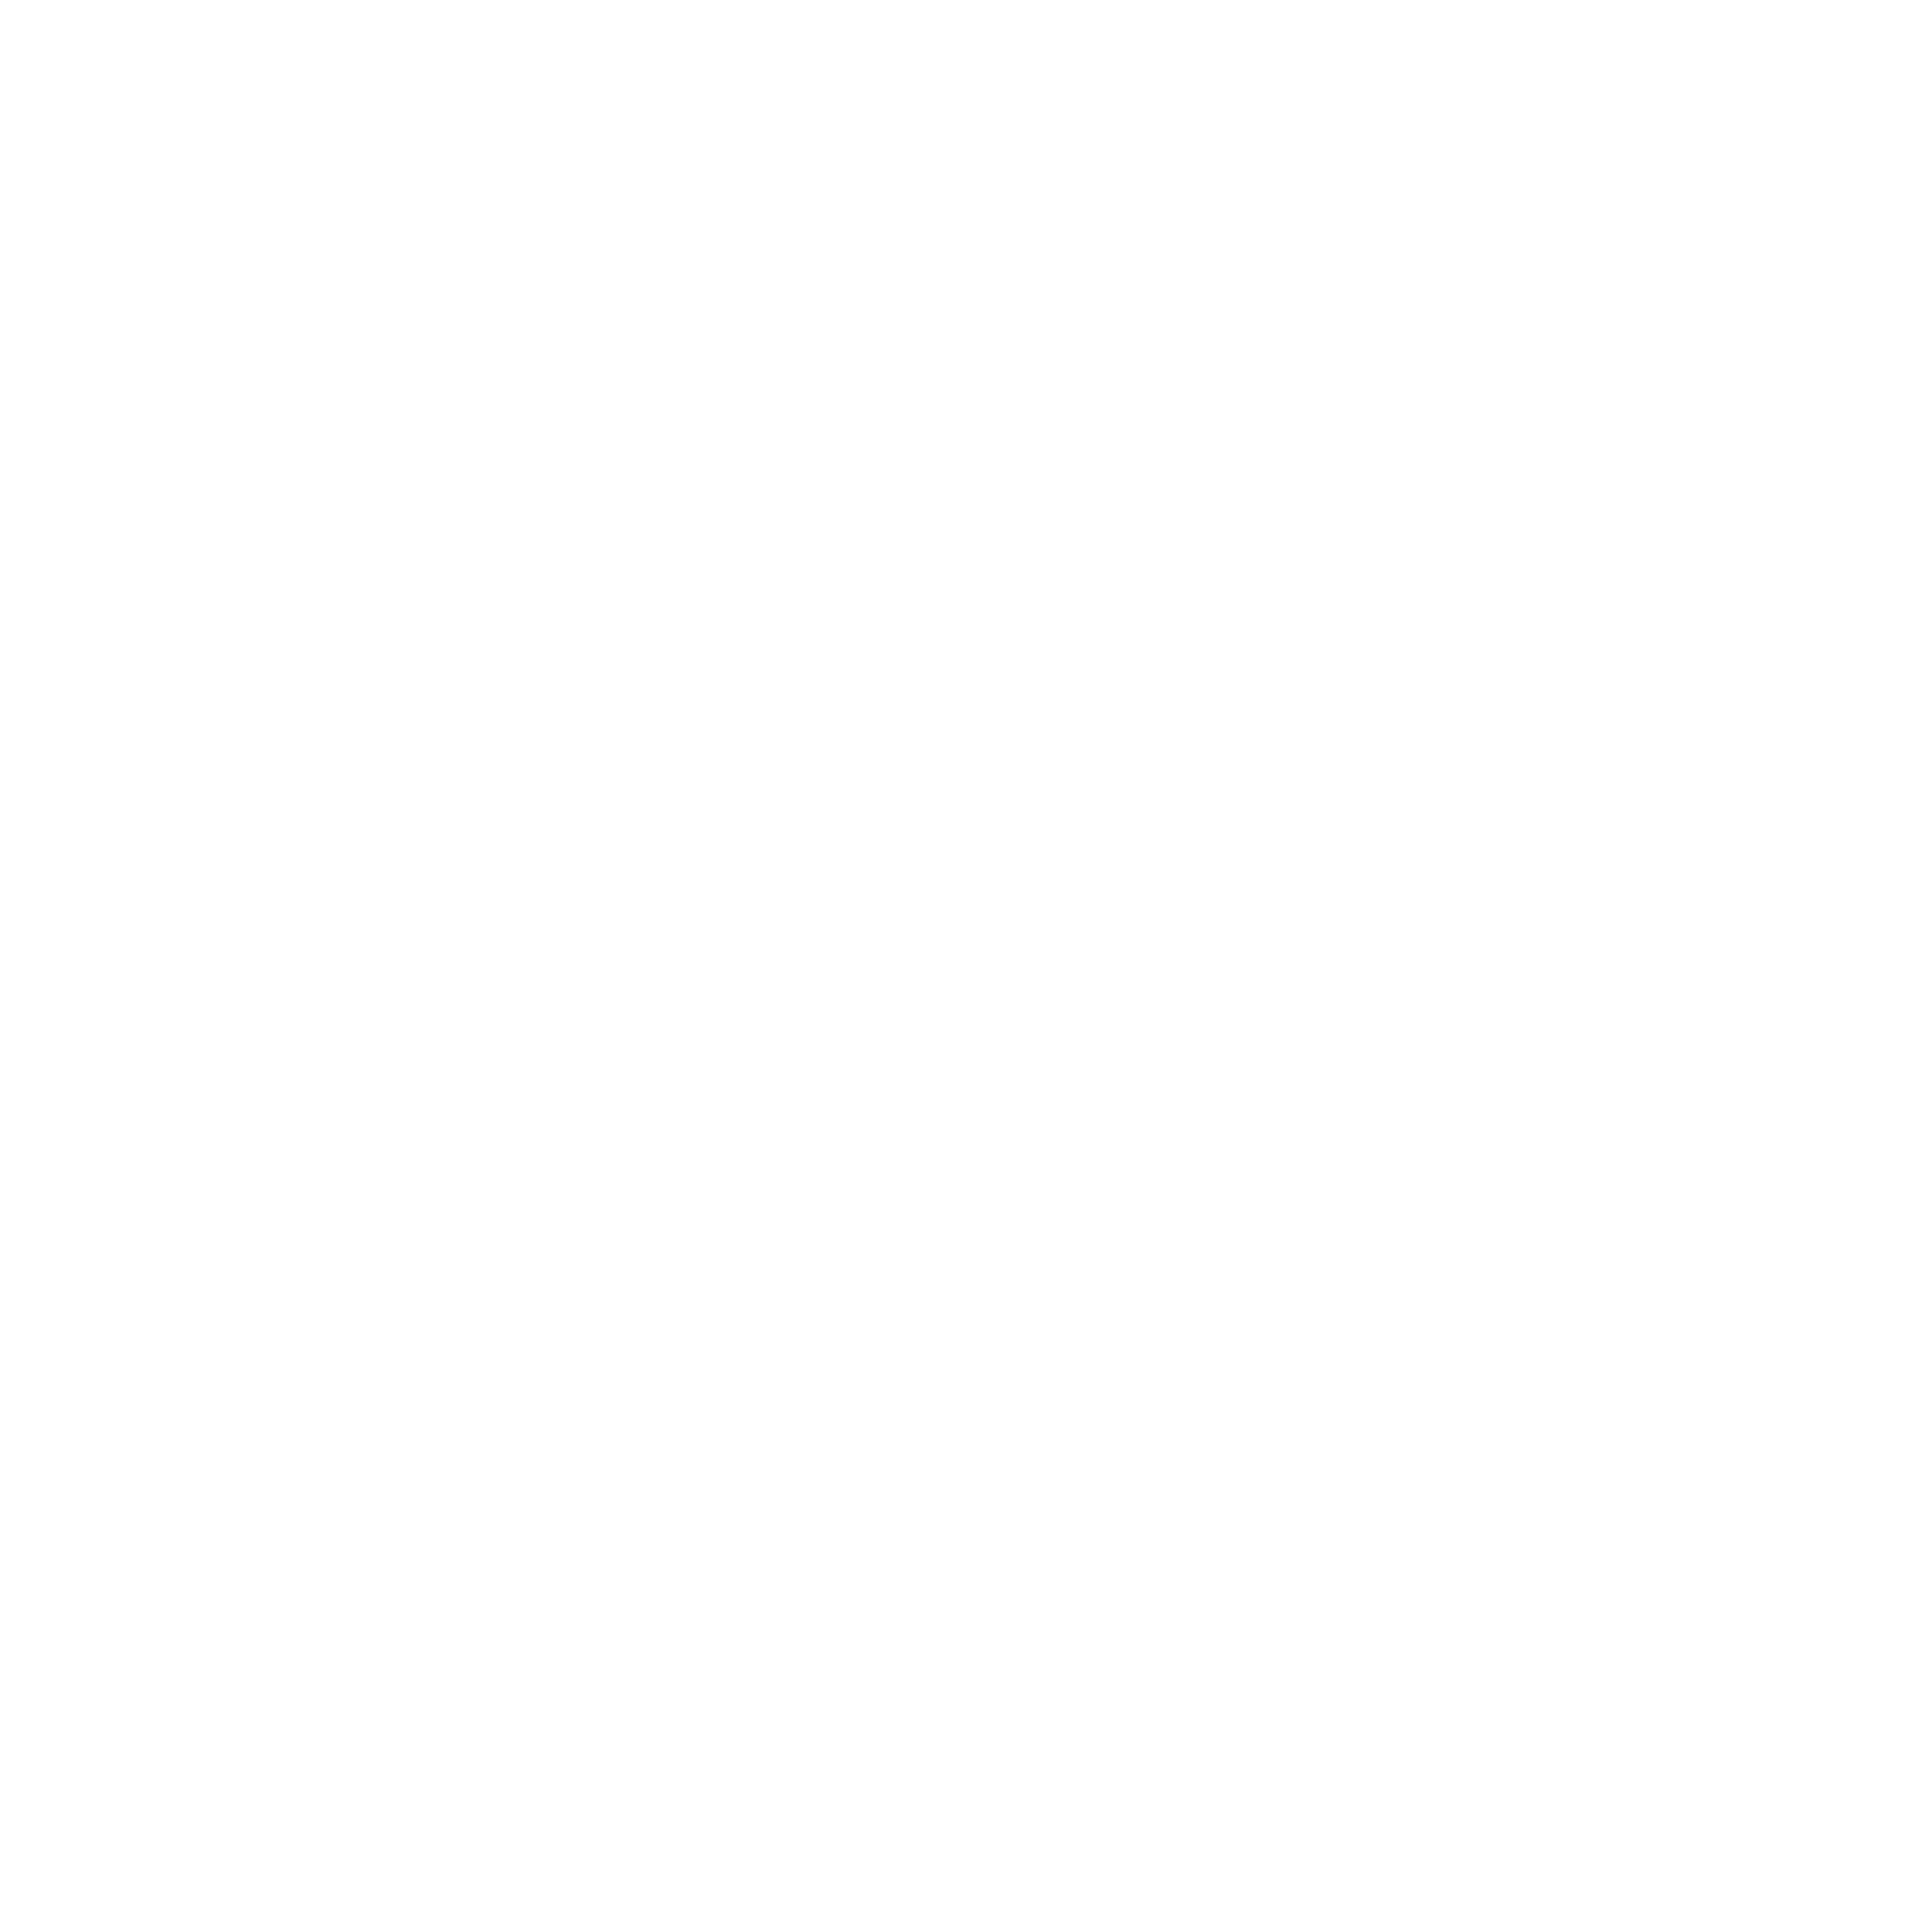

In [14]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import NavigationToolbar2Tk

plt.ion()  # Turn on interactive mode
plt.figure(figsize=(16*2, 16*2))
fig,axes = plt.subplots(3,1,sharex=True)

axes[0].scatter(kin_positions['time'], kin_positions["east"], label='East',color='green')
axes[0].scatter(shotdata['pingTime'], shotdata["east0"], label='East',color='blue',marker='x')
axes[0].scatter(shotdata['returnTime'], shotdata["east1"], label='East Return',color='red',marker='.')
axes[0].set_ylabel('Position East (m)')
# axes[0].legend()
axes[0].grid()

axes[1].scatter(kin_positions['time'], kin_positions["north"], label='North',color='green')
axes[1].scatter(shotdata['pingTime'], shotdata["north0"], label='North',color='blue',marker='x')
axes[1].scatter(shotdata['returnTime'], shotdata["north1"], label='North Return',color='red',marker='.')
axes[1].set_ylabel('Position North (m)')
# axes[1].legend()
axes[1].grid()

axes[2].scatter(kin_positions['time'], kin_positions["up"], label='Up',color='green')
axes[2].scatter(shotdata['pingTime'], shotdata["up0"], label='Up',color='blue',marker='x')
axes[2].scatter(shotdata['returnTime'], shotdata["up1"], label='Up Return',color='red',marker='.')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Position Up (m)')
# axes[2].legend()
axes[2].grid()

plt.title('Kinematic Positions')
plt.show()

In [35]:
import sys
sys.path.append("/Users/franklyndunbar/Project/SeaFloorGeodesy/gnatss")
import gnatss
import datetime

In [39]:
imu_df = dh.imu_position_tdb.read_df(dates[4], dates[5])
imu_df.head()

,time,azimuth,pitch,roll,latitude,longitude,height,latitude_std,longitude_std,height_std,northVelocity,eastVelocity,upVelocity,northVelocity_std,eastVelocity_std,upVelocity_std,roll_std,pitch_std,azimuth_std


In [49]:
GPS_EPOCH = datetime.datetime(1980, 1, 6, 0, 0, 0)
J200_EPOCH = datetime.datetime(2000, 1, 1, 12, 0, 0)

def time_to_gpsweek_seconds(time:datetime.datetime) -> tuple[int, float]:
    """
    Convert a datetime object to GPS week and seconds of week.
    """

    # Calculate the difference in time
    delta = time - GPS_EPOCH

    # Total seconds since GPS epoch
    total_seconds = delta.total_seconds()

    # Calculate GPS week and seconds of week
    gps_week = int(total_seconds // (7 * 24 * 3600))
    seconds_of_week = total_seconds % (7 * 24 * 3600)

    return gps_week, seconds_of_week

def time_to_j200(time:datetime.datetime) -> float:
    """
    Convert a datetime object to Julian Date (JD) and then to J2000.
    """
    # Calculate the difference in time
    delta = time - J200_EPOCH

    # Total seconds since J2000 epoch
    total_seconds = delta.total_seconds()

    return total_seconds

In [52]:
kin_positions.head()

,time,latitude,longitude,height,east,north,up,number_of_satellites,pdop,wrms
0,2022-05-06 00:00:00.000,41.659099,235.062105,-28.1257,-2.733000e+06,-3.912147e+06,4.217372e+06,11,1.4,5.380650
1,2022-05-06 00:00:00.999,41.659097,235.062103,-27.1692,-2.733000e+06,-3.912147e+06,4.217372e+06,11,1.4,4.074118
2,2022-05-06 00:00:01.999,41.659097,235.062104,-27.6261,-2.733000e+06,-3.912147e+06,4.217372e+06,11,1.4,3.511849
3,2022-05-06 00:00:02.999,41.659093,235.062116,-28.1595,-2.732999e+06,-3.912147e+06,4.217371e+06,11,1.4,3.025103
4,2022-05-06 00:00:04.000,41.659087,235.062120,-28.9036,-2.732999e+06,-3.912148e+06,4.217370e+06,11,1.4,2.820126


In [59]:
gps_df = kin_positions.copy()
gps_df.time = gps_df.time.apply(lambda x: time_to_j200(x))
east_velocity = gps_df.east.diff() / gps_df.time.diff()
north_velocity = gps_df.north.diff() / gps_df.time.diff()
up_velocity = gps_df.up.diff() / gps_df.time.diff()

gps_df["ant_x"] = gps_df["east"]
gps_df["ant_y"] = gps_df["north"]
gps_df["ant_z"] = gps_df["up"]

gps_df["east"] = east_velocity
gps_df["north"] = north_velocity
gps_df["up"] = up_velocity

gps_df["ant_sigx"] = 1
gps_df["ant_sigy"] = 1
gps_df["ant_sigz"] = 1

gps_df["rho_xy"] = 0
gps_df["rho_xz"] = 0
gps_df["rho_yz"] = 0

gps_df["east_sig"] = 1
gps_df["north_sig"] = 1
gps_df["up_sig"] = 1

gps_df["v_sden"] = 1
gps_df["v_sdeu"] = 1
gps_df["v_sdnu"] = 1

In [60]:
gps_df.head()

,time,latitude,longitude,height,east,north,up,number_of_satellites,pdop,wrms,...,ant_sigz,rho_xy,rho_xz,rho_yz,east_sig,north_sig,up_sig,v_sden,v_sdeu,v_sdnu
0,7.050672e+08,41.659099,235.062105,-28.1257,NaN,NaN,NaN,11,1.4,5.380650,...,1,0,0,0,1,1,1,1,1,1
1,7.050672e+08,41.659097,235.062103,-27.1692,-0.596497,-0.633934,0.472372,11,1.4,4.074118,...,1,0,0,0,1,1,1,1,1,1
2,7.050672e+08,41.659097,235.062104,-27.6261,0.267500,0.289800,-0.248100,11,1.4,3.511849,...,1,0,0,0,1,1,1,1,1,1
3,7.050672e+08,41.659093,235.062116,-28.1595,0.859700,-0.485100,-0.696200,11,1.4,3.025103,...,1,0,0,0,1,1,1,1,1,1
4,7.050672e+08,41.659087,235.062120,-28.9036,0.330370,-0.115584,-1.012088,11,1.4,2.820126,...,1,0,0,0,1,1,1,1,1,1


In [53]:
shotdata.head()

,pingTime,transponderID,head0,pitch0,roll0,head1,pitch1,roll1,east0,north0,...,east_std1,north_std1,up_std1,returnTime,tt,dbv,xc,snr,tat,isUpdated
0,1.651795e+09,IR5209,131.765137,-1.059283,1.794902,132.588379,3.650667,0.141165,-2.733001e+06,-3.912147e+06,...,7.788,8.154,23.0,1.651795e+09,1.636898,-30,68,15.0,0.2,0
1,1.651795e+09,IR5209,150.774673,-0.521324,-3.328873,143.650452,3.974211,1.485776,-2.733006e+06,-3.912151e+06,...,7.804,8.155,23.0,1.651795e+09,1.634609,-10,76,36.0,0.2,0
2,1.651795e+09,IR5209,130.266647,3.410717,-2.966369,132.388718,4.405166,0.993787,-2.733012e+06,-3.912156e+06,...,7.845,8.155,23.0,1.651795e+09,1.631912,-10,88,37.0,0.2,0
3,1.651795e+09,IR5209,141.069656,-13.314089,8.962605,137.545593,3.645947,2.781657,-2.733016e+06,-3.912161e+06,...,7.843,8.131,23.0,1.651795e+09,1.627579,-10,80,38.0,0.2,0
4,1.651795e+09,IR5209,137.902283,-3.733109,-6.117216,138.326904,5.988830,-2.783530,-2.733020e+06,-3.912166e+06,...,7.828,8.125,23.0,1.651795e+09,1.624502,-13,78,34.0,0.2,0


In [63]:
position_df_0 = shotdata[["pingTime", "east0", "north0", "up0","head0","pitch0","roll0","east_std0","north_std0","up_std0"]]
position_df_1 = shotdata[["returnTime", "east1", "north1", "up1","head1","pitch1","roll1","east_std1","north_std1","up_std1"]]

east_velocity_0 = position_df_0["east0"].diff() / position_df_0["pingTime"].diff()
north_velocity_0 = position_df_0["north0"].diff() / position_df_0["pingTime"].diff()
up_velocity_0 = position_df_0["up0"].diff() / position_df_0["pingTime"].diff()

east_velocity_1 = position_df_1["east1"].diff() / position_df_1["returnTime"].diff()
north_velocity_1 = position_df_1["north1"].diff() / position_df_1["returnTime"].diff()
up_velocity_1 = position_df_1["up1"].diff() / position_df_1["returnTime"].diff()



position_df_0 = position_df_0.rename(columns={"east0": "ant_x", "north0": "ant_y", "up0": "ant_z"})

position_df_1 = position_df_1.rename(columns={"east1": "ant_x", "north1": "ant_y", "up1": "ant_z"})



position_df_0 = position_df_0.rename(columns={"east_std0": "ant_sigx", "north_std0": "ant_sigy", "up_std0": "ant_sigz"})

position_df_1 = position_df_1.rename(columns={"east_std1": "ant_sigx", "north_std1": "ant_sigy", "up_std1": "ant_sigz"})

position_df_0 = position_df_0.rename(columns={"head0": "heading", "pitch0": "pitch", "roll0": "roll"})
position_df_1 = position_df_1.rename(columns={"head1": "heading", "pitch1": "pitch", "roll1": "roll"})

position_df_0["east"] = east_velocity_0
position_df_0["north"] = north_velocity_0
position_df_0["up"] = up_velocity_0

position_df_0["east_sig"] = position_df_0["ant_sigx"]
position_df_0["north_sig"] = position_df_0["ant_sigy"]
position_df_0["up_sig"] = position_df_0["ant_sigz"]

position_df_1["east"] = east_velocity_1
position_df_1["north"] = north_velocity_1
position_df_1["up"] = up_velocity_1

position_df_1["east_sig"] = position_df_1["ant_sigx"]
position_df_1["north_sig"] = position_df_1["ant_sigy"]
position_df_1["up_sig"] = position_df_1["ant_sigz"]

position_df_0["rho_xy"] = position_df_0["rho_xz"] = position_df_0["rho_yz"] = 0
position_df_1["rho_xy"] = position_df_1["rho_xz"] = position_df_1["rho_yz"] = 0
position_df_0["v_sden"] =  position_df_0["v_sdeu"] = position_df_0["v_sdnu"] = 1
position_df_1["v_sden"] =  position_df_1["v_sdeu"] = position_df_1["v_sdnu"] = 1

position_df_0 = position_df_0.rename(columns={"pingTime": "time"})
position_df_1 = position_df_1.rename(columns={"returnTime": "time"})

position_df_0.time = pd.to_datetime(position_df_0.time, unit='s')
position_df_1.time = pd.to_datetime(position_df_1.time, unit='s')

In [66]:
position_df = pd.concat([position_df_0, position_df_1])
position_df.time = position_df.time.apply(lambda x: time_to_j200(x))
position_df.head()


,time,ant_x,ant_y,ant_z,heading,pitch,roll,ant_sigx,ant_sigy,ant_sigz,...,up,east_sig,north_sig,up_sig,rho_xy,rho_xz,rho_yz,v_sden,v_sdeu,v_sdnu
0,705067209.0,-2.733001e+06,-3.912147e+06,4.217367e+06,131.765137,-1.059283,1.794902,7.788,8.154,23.0,...,NaN,7.788,8.154,23.0,0,0,0,1,1,1
1,705067224.0,-2.733006e+06,-3.912151e+06,4.217361e+06,150.774673,-0.521324,-3.328873,7.804,8.155,23.0,...,-0.433605,7.804,8.155,23.0,0,0,0,1,1,1
2,705067239.0,-2.733012e+06,-3.912156e+06,4.217353e+06,130.266647,3.410717,-2.966369,7.845,8.155,23.0,...,-0.525253,7.845,8.155,23.0,0,0,0,1,1,1
3,705067254.0,-2.733016e+06,-3.912161e+06,4.217347e+06,141.069656,-13.314089,8.962605,7.843,8.131,23.0,...,-0.410933,7.843,8.131,23.0,0,0,0,1,1,1
4,705067269.0,-2.733020e+06,-3.912166e+06,4.217340e+06,137.902283,-3.733109,-6.117216,7.828,8.125,23.0,...,-0.478943,7.828,8.125,23.0,0,0,0,1,1,1


In [68]:
df_all = pd.concat([position_df, gps_df])
df_all.head()

,time,ant_x,ant_y,ant_z,heading,pitch,roll,ant_sigx,ant_sigy,ant_sigz,...,rho_yz,v_sden,v_sdeu,v_sdnu,latitude,longitude,height,number_of_satellites,pdop,wrms
0,705067209.0,-2.733001e+06,-3.912147e+06,4.217367e+06,131.765137,-1.059283,1.794902,7.788,8.154,23.0,...,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,705067224.0,-2.733006e+06,-3.912151e+06,4.217361e+06,150.774673,-0.521324,-3.328873,7.804,8.155,23.0,...,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,705067239.0,-2.733012e+06,-3.912156e+06,4.217353e+06,130.266647,3.410717,-2.966369,7.845,8.155,23.0,...,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,705067254.0,-2.733016e+06,-3.912161e+06,4.217347e+06,141.069656,-13.314089,8.962605,7.843,8.131,23.0,...,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,705067269.0,-2.733020e+06,-3.912166e+06,4.217340e+06,137.902283,-3.733109,-6.117216,7.828,8.125,23.0,...,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
